In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [99]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

In [100]:
#Reading data and print its information
data=pd.read_csv("/content/drive/My Drive/Colab Notebooks/IRIS.csv")
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


In [101]:
#head data
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


In [102]:
#tail data
data.tail()

,sepal_length,sepal_width,petal_length,petal_width,species
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica
149,5.9,3.0,5.1,1.8,Iris-virginica


In [103]:
data. describe()

,sepal_length,sepal_width,petal_length,petal_width
count,150.000000,150.000000,150.000000,150.000000
mean,5.843333,3.054000,3.758667,1.198667
std,0.828066,0.433594,1.764420,0.763161
min,4.300000,2.000000,1.000000,0.100000
25%,5.100000,2.800000,1.600000,0.300000
50%,5.800000,3.000000,4.350000,1.300000
75%,6.400000,3.300000,5.100000,1.800000
max,7.900000,4.400000,6.900000,2.500000


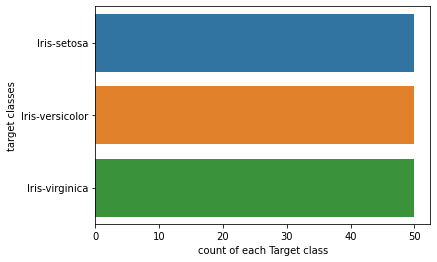

In [104]:
#shows the count of instances for each class
sns.countplot(y=data['species'],data=data)
plt.ylabel('target classes')
plt.xlabel('count of each Target class')
plt.show()

In [105]:
data = data.sample(n=7)
data.head()

,sepal_length,sepal_width,petal_length,petal_width,species
147,6.5,3.0,5.2,2.0,Iris-virginica
58,6.6,2.9,4.6,1.3,Iris-versicolor
111,6.4,2.7,5.3,1.9,Iris-virginica
21,5.1,3.7,1.5,0.4,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa


In [170]:
from sklearn.model_selection import train_test_split
x = data.drop(['species'], axis =1)
y = data['species']
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.5, random_state = 0)

In [171]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.fit_transform(x_test)

In [172]:
# Building Regression model
from sklearn.linear_model import LogisticRegression
reg = LogisticRegression(multi_class='multinomial',solver='lbfgs')
reg.fit(x_train, y_train)

LogisticRegression(multi_class='multinomial')

In [173]:
y_pred = reg.predict(x_test)
y_proba = reg.predict_proba(x_test)
y_pred

array(['Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-setosa'], dtype=object)

In [174]:
score_lr= reg.score(x_test,y_test)
print("Accuracy:",score_lr)

Accuracy: 0.75


In [175]:
actual=y_test
predicted=y_pred
results=confusion_matrix(actual,predicted)
print('confusion matrix:')
print(results)

confusion matrix:
[[1 0 0]
 [0 1 1]
 [0 0 1]]


In [176]:
# Building model for SVC
from sklearn.svm import SVC
clf = SVC(kernel='linear', C=1.0, random_state=0)
clf.fit(x_train, y_train)

SVC(kernel='linear', random_state=0)

In [177]:
# Accuracy and Confusion Matrix of train data
print ("Train - Accuracy :", accuracy_score(y_train, clf.predict(x_train)))
print ("Train - Confusion matrix :\n",confusion_matrix(y_train, clf.predict(x_train)))

Train - Accuracy : 1.0
Train - Confusion matrix :
 [[1 0 0]
 [0 1 0]
 [0 0 1]]


In [178]:
# Accuracy and Confusion Matrix of test data
print ("Test - Accuracy :", accuracy_score(y_test, clf.predict(x_test)))
print ("Test - Confusion matrix :\n",confusion_matrix(y_test, clf.predict(x_test)))

Test - Accuracy : 0.75
Test - Confusion matrix :
 [[1 0 0]
 [0 1 1]
 [0 0 1]]


In [179]:
# taking sample data for prediction
num=[[6.4,2.9,4.3,1.3]]
print(num)
num=sc.fit_transform(num)

[[6.4, 2.9, 4.3, 1.3]]


In [180]:
# predicting a sample data with SVC model
u=clf.predict(num)
u[0]

'Iris-versicolor'

In [181]:
# predicting a sample data with regression model
res = reg.predict(num)
res[0]

'Iris-versicolor'